# Validation of the algorithm

Validation of the algorithm to calculate the projected area with a torus and a cone.
Estimation is performed for different scales (image sizes) from 1 (300 x 300) to 32 (9600 x 9600).

Further examples can be easily produced with the geometries produced by the `generate_stl.py` script.

First we load the necessary modules and generate the stl files, if they do not exist yet, and the parametric study analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import projectArea

import pathlib
if not pathlib.Path('./geometry').exists():
    %run generate_stl.py
    
# parameters
scales = (1,2,4,8,16,32) # scales to analyze
plot_precision = 0.002 # plot y-lim offset

Before jumping into the validation of the algorithm, common function for the evaluation and plot of the calculated areas are defined.

In [2]:
def calculate_convergence(file,direction,target):
    """ Perform the calculation for different scales (resolutions) and
    returns the plot axis
    """
    print(f'target: {target:.5e}')
    
    areas = []
    for scale in scales:
        area, resolution = projectArea.project(
            file,direction=direction,
            scale=scale,
            verbose=False, # change it to True to get more info
            )
        print(f'- scale: {scale:d}, area: {area:.5e}')
        areas.append(area)
    areas_norm = np.array(areas)/analytical
    
    fig, ax = plt.subplots(1,1,layout='constrained')
    ax.plot(scales,areas_norm,'o')
    ax.axhline(y=1.0,linestyle='--',color='r')
    
    ax.set_xlabel('scale')
    ax.set_xscale('log')
    ax.set_xticks(scales)
    ax.set_xticklabels([str(s) for s in scales])
    
    ax.set_ylabel('$A/A_{analytical}$')
    ax.set_ylim([
        1.0-plot_precision,
        np.ceil(areas_norm.max()/plot_precision)*plot_precision]
    )

    return ax


def add_text(ax,string):
    """ add a text with the analytical value """
    ax.text(0.85,0.85,string,
        fontsize='large',
        ha='right',va='center',transform=ax.transAxes
       );

# Cone

height: `h = 1.0`

radius: `r = 1.0`

![cone](./images/cone.png)

## x-direction

The projected form is a circle of radius `r`

target: 3.14159e+00
- scale: 1, area: 3.16587e+00
- scale: 2, area: 3.15453e+00
- scale: 4, area: 3.14767e+00
- scale: 8, area: 3.14437e+00
- scale: 16, area: 3.14270e+00
- scale: 32, area: 3.14188e+00


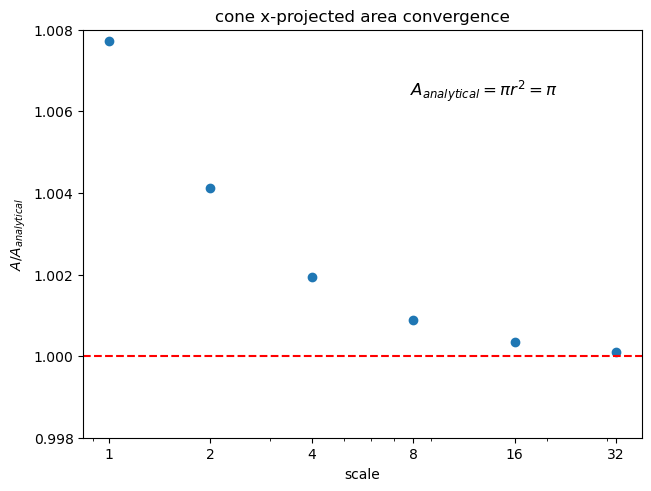

In [3]:
analytical = np.pi*1.0*1.0
ax = calculate_convergence('geometry/cone.stl','x',analytical)
ax.set_title('cone x-projected area convergence')
add_text(ax,'$A_{analytical} = \pi r^2 = \pi$')

## z-direction

The projected form is a triangle of height `h` and base `r`

target: 2.00000e+00
- scale: 1, area: 2.01827e+00
- scale: 2, area: 2.01833e+00
- scale: 4, area: 2.00681e+00
- scale: 8, area: 2.00248e+00
- scale: 16, area: 2.00176e+00
- scale: 32, area: 2.00104e+00


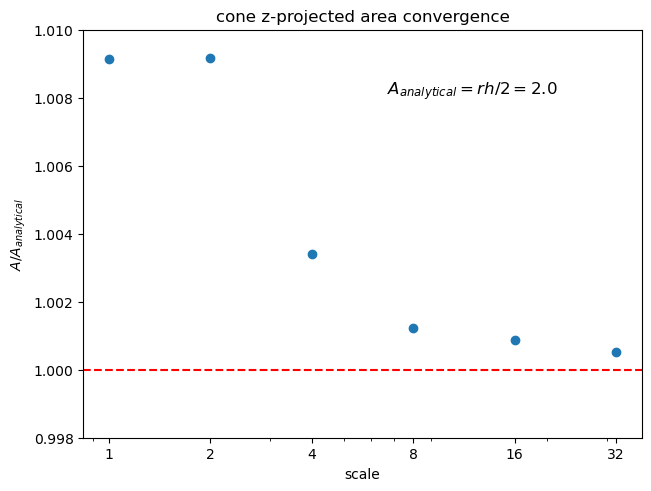

In [4]:
analytical = 2.0*2.0/2.0
ax = calculate_convergence('geometry/cone.stl','z',analytical)
ax.set_title('cone z-projected area convergence')
add_text(ax,'$A_{analytical} = r h / 2 = 2.0$')

## Torus

torus radius: R = 1

section radius: r = 1/2


![trous](./images/cone.png)

## y-direction

The projected form is a [stadium shape](https://en.wikipedia.org/wiki/Stadium_(geometry)) with length `R` and radius `r`

target: 2.78540e+00
- scale: 1, area: 2.83454e+00
- scale: 2, area: 2.79865e+00
- scale: 4, area: 2.79433e+00
- scale: 8, area: 2.79224e+00
- scale: 16, area: 2.78758e+00
- scale: 32, area: 2.78705e+00


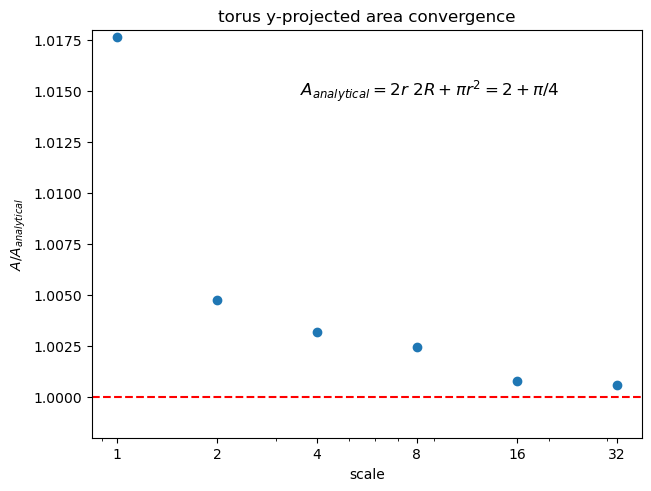

In [5]:
analytical = 2.0*1.0*2.0*0.5 + np.pi*0.5*0.5
ax = calculate_convergence('geometry/torus.stl','y',analytical)
ax.set_title('torus y-projected area convergence')
add_text(ax,'$A_{analytical} = 2r~2R + \pi r^2 = 2 + \pi/4$')

## z-direction

The projected form is a disk with an outer radius of `(R+r)` and an inner radius of `(R-r)`

target: 6.28319e+00
- scale: 1, area: 6.34795e+00
- scale: 2, area: 6.31639e+00
- scale: 4, area: 6.29808e+00
- scale: 8, area: 6.29000e+00
- scale: 16, area: 6.28603e+00
- scale: 32, area: 6.28399e+00


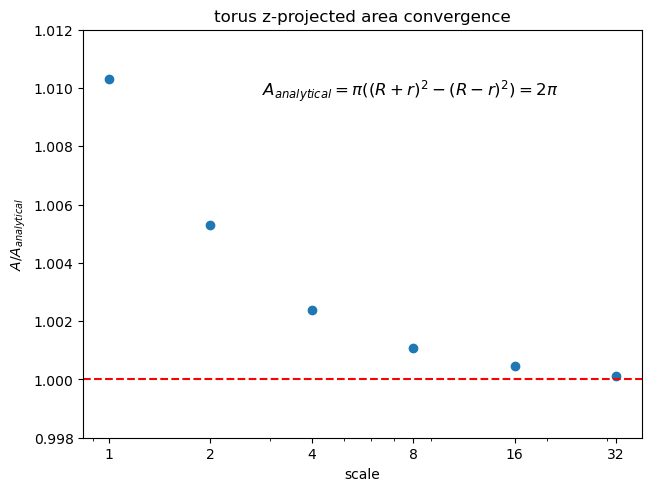

In [6]:
analytical = np.pi*1.5*1.5 - np.pi*0.5*0.5
ax = calculate_convergence('geometry/torus.stl','z',analytical)
ax.set_title('torus z-projected area convergence')
add_text(ax,'$A_{analytical} = \pi((R+r)^2 - (R-r)^2) = 2 \pi$')